In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


https://www.janestreet.com/puzzles/current-puzzle/ TODO: update link

#### Expected Lost Distance in Fast Lane ($v_s > a$)  
When a faster car overtakes a slower car in the fast lane:  
Lost distance = $(v_s - a)^2$ (Can be easily derived using basic cinematic formulas)

Since probability of $v_s$ evenly distributed in $[a, 2]$, expected value for lost distance:  
$E_{\text{fast}}[(v_s - a)^2] = \int_{a}^{2} (v_s - a)^2 \cdot \frac{1}{2 - a} \, dv_s = \frac{(2 - a)^2}{3}$

In [2]:
def expected_loss_fast_lane(a):
    return (2 - a)**2 / 3 

#### Expected Lost Distance in Slow Lane ($v_s \leq a$)  
When a faster car overtakes in the slow lane:  
Lost distance $= v_s^2$(Can be easily derived using basic cinematic formulas)  
For uniform $v_s \in [1, a]$:

$E_{\text{slow}}[v_s^2] = \int_{1}^{a} (v_s)^2 \cdot \frac{1}{a - 1} \, dv_s = \frac{a^2 + a + 1}{3}$

In [3]:
def expected_loss_slow_lane(a):
    return (a**2 + a + 1) / 3

#### Total expected Lost distance and probabilities:
For two cars with speeds v_f (faster) and v_s (slower), the interaction happens if:  
1. They are in the same lane. Given that z is small, the probability that two cars are in the same lane and interact is   
proportional to the probability that their speeds are on the same side of a. Probabilities of two cars are independent and thatswhy multiplied.  
2. The faster car catches up to the slower one. Faster car is either in the front or behind the slow car, so the probability is 0.5.

In [4]:
def total_expected_loss(a):
    P_fast = (2 - a)**2 / 2 
    P_slow = (a - 1)**2 / 2 
    return P_fast * expected_loss_fast_lane(a) + P_slow * expected_loss_slow_lane(a)

#### Answer
We are asked to minimize expected lost distance.  
Manually taking the derivative of the derived function is tedious so we retreat to help of scipy.

In [7]:
result = minimize_scalar(total_expected_loss, bounds=(1, 2), method='bounded')
optimal_a = result.x
print(f"Optimal a = {optimal_a:.10f}") ### 1.2256016434

Optimal a = 1.2256016434


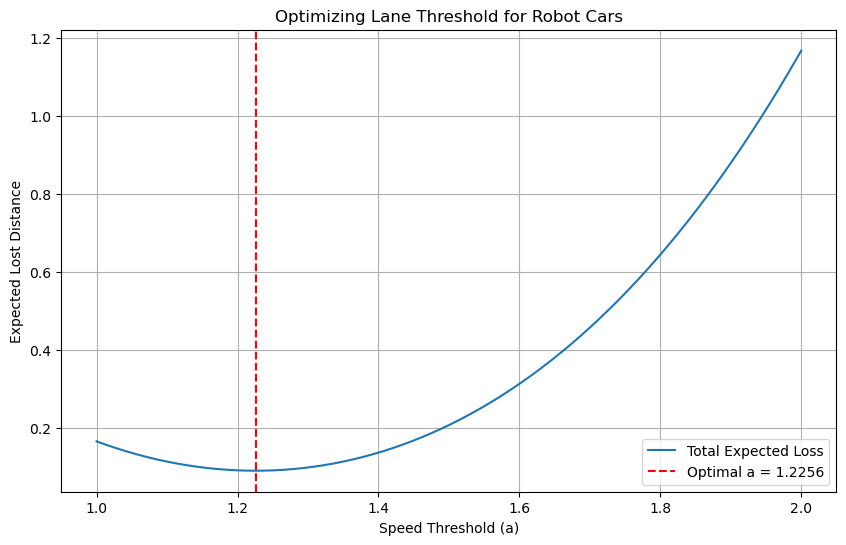

In [6]:
a_values = np.linspace(1, 2, 500)
losses = [total_expected_loss(a) for a in a_values]

plt.figure(figsize=(10, 6))
plt.plot(a_values, losses, label="Total Expected Loss")
plt.axvline(optimal_a, color='red', linestyle='--', label=f"Optimal a = {optimal_a:.4f}")
plt.xlabel("Speed Threshold (a)")
plt.ylabel("Expected Lost Distance")
plt.title("Optimizing Lane Threshold for Robot Cars")
plt.legend()
plt.grid()
plt.show()